In [1]:
import pandas

In [2]:
df = pandas.read_csv('transfusion.csv', index_col=0, header=0)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
id,,,,,
1,2,50,12500,98,1
2,0,13,3250,28,1
3,1,16,4000,35,1
4,2,20,5000,45,1
5,1,24,6000,77,0


In [3]:
## 选中最后一行
y = df.iloc[:,-1]

## 选中第一行到最后一行
x = df.iloc[:,:-1]

# 区分训练与测试数据集

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

# 尺度标准化

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# 建立ANN

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [8]:
classifier = Sequential()
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='relu', input_dim = 4))
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = classifier.fit(x_train, y_train, 
                        batch_size = 10, 
                        epochs = 100,
                        validation_data = (x_test, y_test))

Train on 499 samples, validate on 247 samples
Epoch 1/100
499/499 [==============================] - 0s 375us/step - loss: 0.6870 - accuracy: 0.7515 - val_loss: 0.6783 - val_accuracy: 0.7814
Epoch 2/100
499/499 [==============================] - 0s 123us/step - loss: 0.6723 - accuracy: 0.7515 - val_loss: 0.6588 - val_accuracy: 0.7814
Epoch 3/100
499/499 [==============================] - 0s 109us/step - loss: 0.6511 - accuracy: 0.7515 - val_loss: 0.6308 - val_accuracy: 0.7814
Epoch 4/100
499/499 [==============================] - 0s 114us/step - loss: 0.6207 - accuracy: 0.7515 - val_loss: 0.5932 - val_accuracy: 0.7814
Epoch 5/100
499/499 [==============================] - 0s 112us/step - loss: 0.5843 - accuracy: 0.7515 - val_loss: 0.5511 - val_accuracy: 0.7814
Epoch 6/100
499/499 [==============================] - 0s 111us/step - loss: 0.5505 - accuracy: 0.7515 - val_loss: 0.5176 - val_accuracy: 0.7814
Epoch 7/100
499/499 [==============================] - 0s 117us/step - loss: 0.5260 

Epoch 57/100
499/499 [==============================] - 0s 108us/step - loss: 0.4669 - accuracy: 0.7896 - val_loss: 0.4686 - val_accuracy: 0.7854
Epoch 58/100
499/499 [==============================] - 0s 107us/step - loss: 0.4668 - accuracy: 0.7876 - val_loss: 0.4681 - val_accuracy: 0.7854
Epoch 59/100
499/499 [==============================] - 0s 103us/step - loss: 0.4666 - accuracy: 0.7896 - val_loss: 0.4686 - val_accuracy: 0.7854
Epoch 60/100
499/499 [==============================] - 0s 105us/step - loss: 0.4665 - accuracy: 0.7896 - val_loss: 0.4689 - val_accuracy: 0.7854
Epoch 61/100
499/499 [==============================] - 0s 101us/step - loss: 0.4670 - accuracy: 0.7936 - val_loss: 0.4685 - val_accuracy: 0.7854
Epoch 62/100
499/499 [==============================] - 0s 101us/step - loss: 0.4663 - accuracy: 0.7876 - val_loss: 0.4685 - val_accuracy: 0.7854
Epoch 63/100
499/499 [==============================] - 0s 102us/step - loss: 0.4660 - accuracy: 0.7896 - val_loss: 0.4680 -

# 评估模型

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
y_pred

array([[0.08106285],
       [0.5688983 ],
       [0.11541128],
       [0.32319015],
       [0.04050699],
       [0.27176356],
       [0.16929567],
       [0.30868083],
       [0.40485293],
       [0.32915398],
       [0.1565237 ],
       [0.10640541],
       [0.08106285],
       [0.2046268 ],
       [0.08106285],
       [0.20624843],
       [0.08106285],
       [0.10134685],
       [0.05391449],
       [0.16925481],
       [0.27176356],
       [0.16400588],
       [0.30229473],
       [0.5688983 ],
       [0.08106285],
       [0.13669872],
       [0.08936211],
       [0.08106285],
       [0.22015145],
       [0.36162597],
       [0.04050699],
       [0.13669872],
       [0.45208052],
       [0.13195899],
       [0.32319015],
       [0.1260618 ],
       [0.27702868],
       [0.16925481],
       [0.3992452 ],
       [0.4682818 ],
       [0.47427642],
       [0.48219   ],
       [0.5420184 ],
       [0.32319015],
       [0.34461766],
       [0.52531946],
       [0.07806021],
       [0.228

In [11]:
predicted = (y_pred > 0.5).flatten().astype(int)

In [12]:
predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0])

# 混淆矩阵 Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted)

array([[180,  13],
       [ 39,  15]])

# ROC 曲线 Receiver Operating Characteristic

In [14]:
from sklearn.metrics import roc_curve

fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

Populating the interactive namespace from numpy and matplotlib


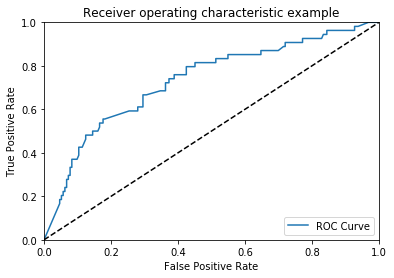

In [15]:
%pylab inline
import matplotlib.pyplot as plt

plt.plot(fpr_ary, tpr_ary, label = 'ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

# 计算 AUC 曲线下面积（Area Under Curve)

In [17]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)

0.732249088466705

# 使用ROC Curve 比较模型

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


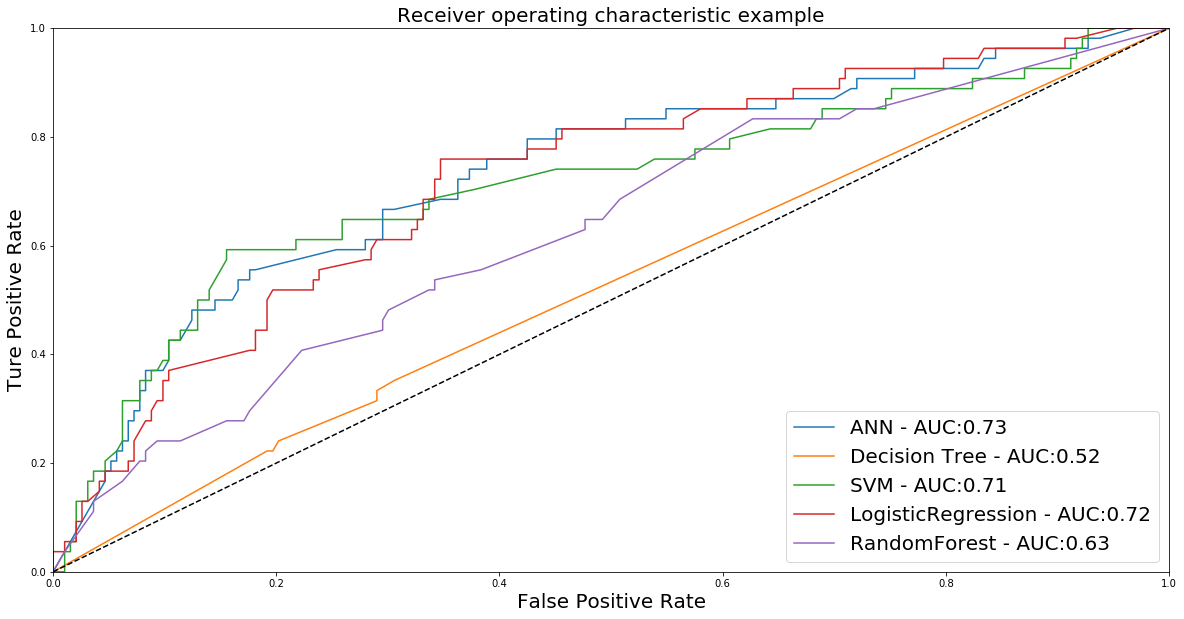

In [28]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=[20, 10])
for clf, title in zip([classifier, clf1, clf2, clf3, clf4], ['ANN', 'Decision Tree', 'SVM', 'LogisticRegression','RandomForest']):
    if title != 'ANN':
        probas = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr_ary, tpr_ary, thresholds = roc_curve(y_test, probas[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr_ary, tpr_ary, label = '%s - AUC:%.2f'%(title, auc(fpr_ary, tpr_ary)))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('Ture Positive Rate', fontsize=20)
plt.title('Receiver operating characteristic example', fontsize=20)
plt.legend(loc='lower right', fontsize=20)
plt.show()